In [3]:
# logistic regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")
df = insurance.copy() #This prevents any unintended modifications to the main dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isna().sum() #Calculate the number of missing values per column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info() #Get data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe().T #You can use the describe() function along with the .T attribute to transpose the summary statistics table generated by Pandas for your DataFrame

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:

df['bmi'].value_counts() #Counts body mass index



32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

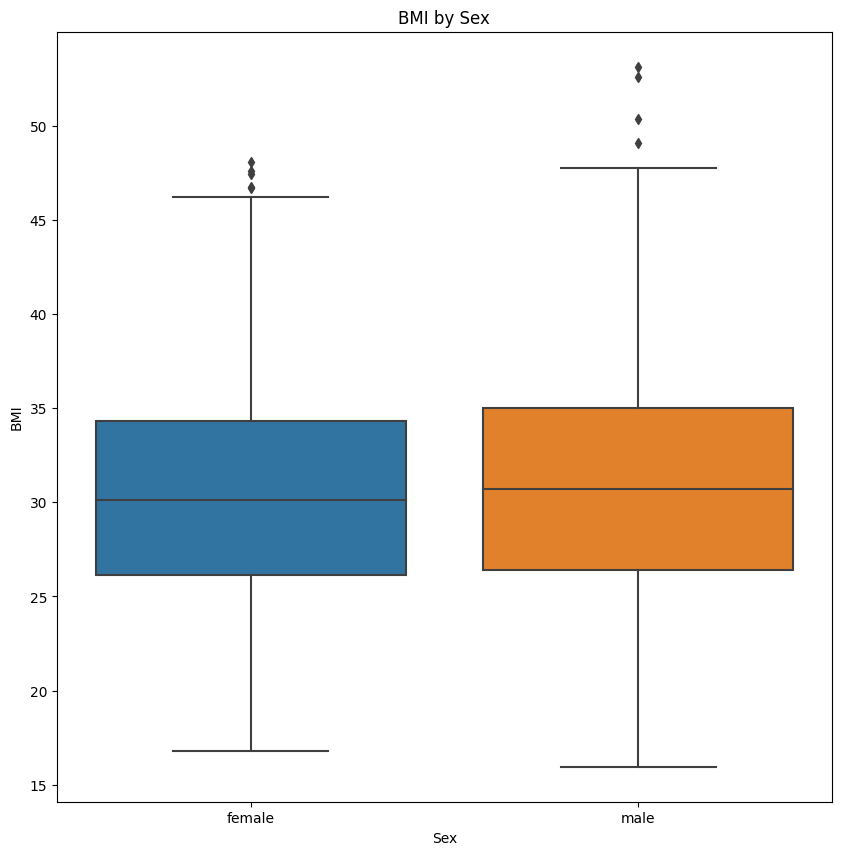

In [12]:
#The relationship between “bmi” and “sex”

plt.figure(figsize=(10, 10))
sns.boxplot(x="sex", y="bmi", data=df)  # df, our data frame's name
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.title("BMI by Sex")
plt.show()

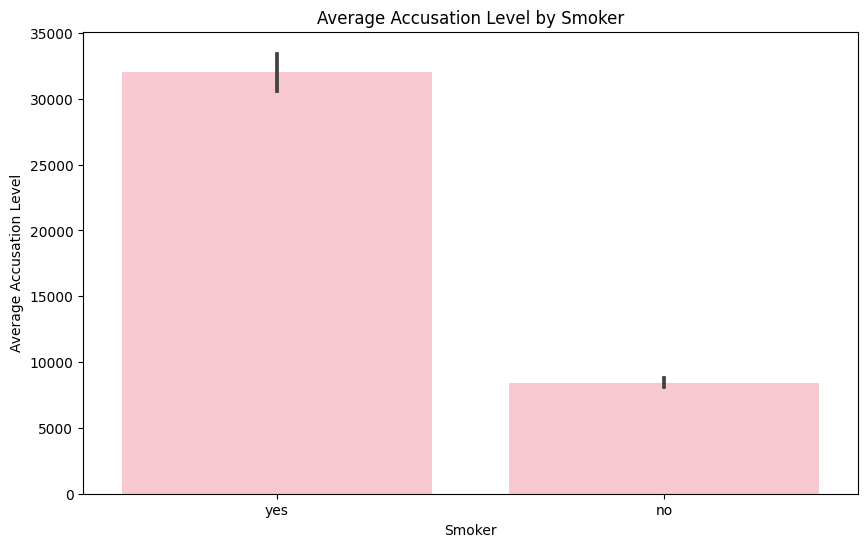

In [13]:
#The relationship between “smoker” and “charges”

plt.figure(figsize = (10,6))
sns.barplot(x ="smoker", y ="charges", data=df, color= "pink")
plt.xlabel("Smoker")
plt.ylabel("Average Accusation Level")
plt.title("Average Accusation Level by Smoker")
plt.show()

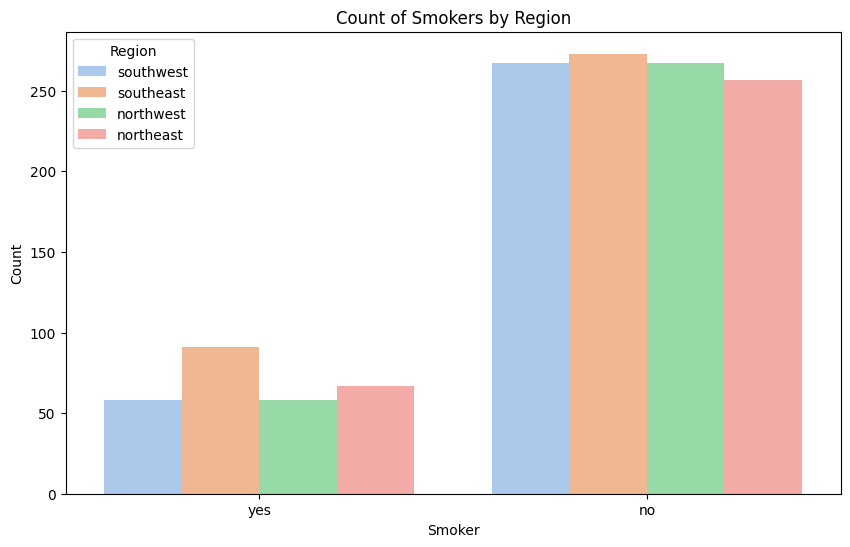

In [15]:
#The relationship between “smoker” and “region”

plt.figure(figsize=(10, 6))
sns.countplot(x="smoker", hue="region", data=df, palette="pastel")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Count of Smokers by Region")
plt.legend(title="Region")
plt.show()

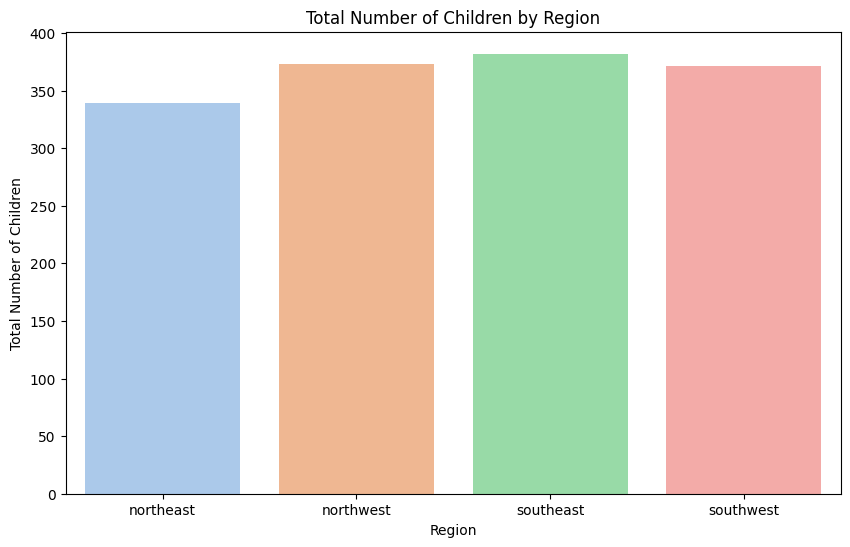

In [16]:
#Find the "region" with the most "children"

plt.figure(figsize=(10, 6))
region_children_sum = df.groupby('region')['children'].sum()
sns.barplot(x=region_children_sum.index, y=region_children_sum.values, palette="pastel")
plt.xlabel("Region")
plt.ylabel("Total Number of Children")
plt.title("Total Number of Children by Region")
plt.show()

In [17]:
most_children_region = df.groupby('region')['children'].sum().idxmax() #This code calculates the total number of children by grouping the "children" column by region and finds the region with the highest total number of children. The idxmax() function returns the index with the largest value.
print(f"Region with the most children: { most_children_region}")

Region with the most children: southeast


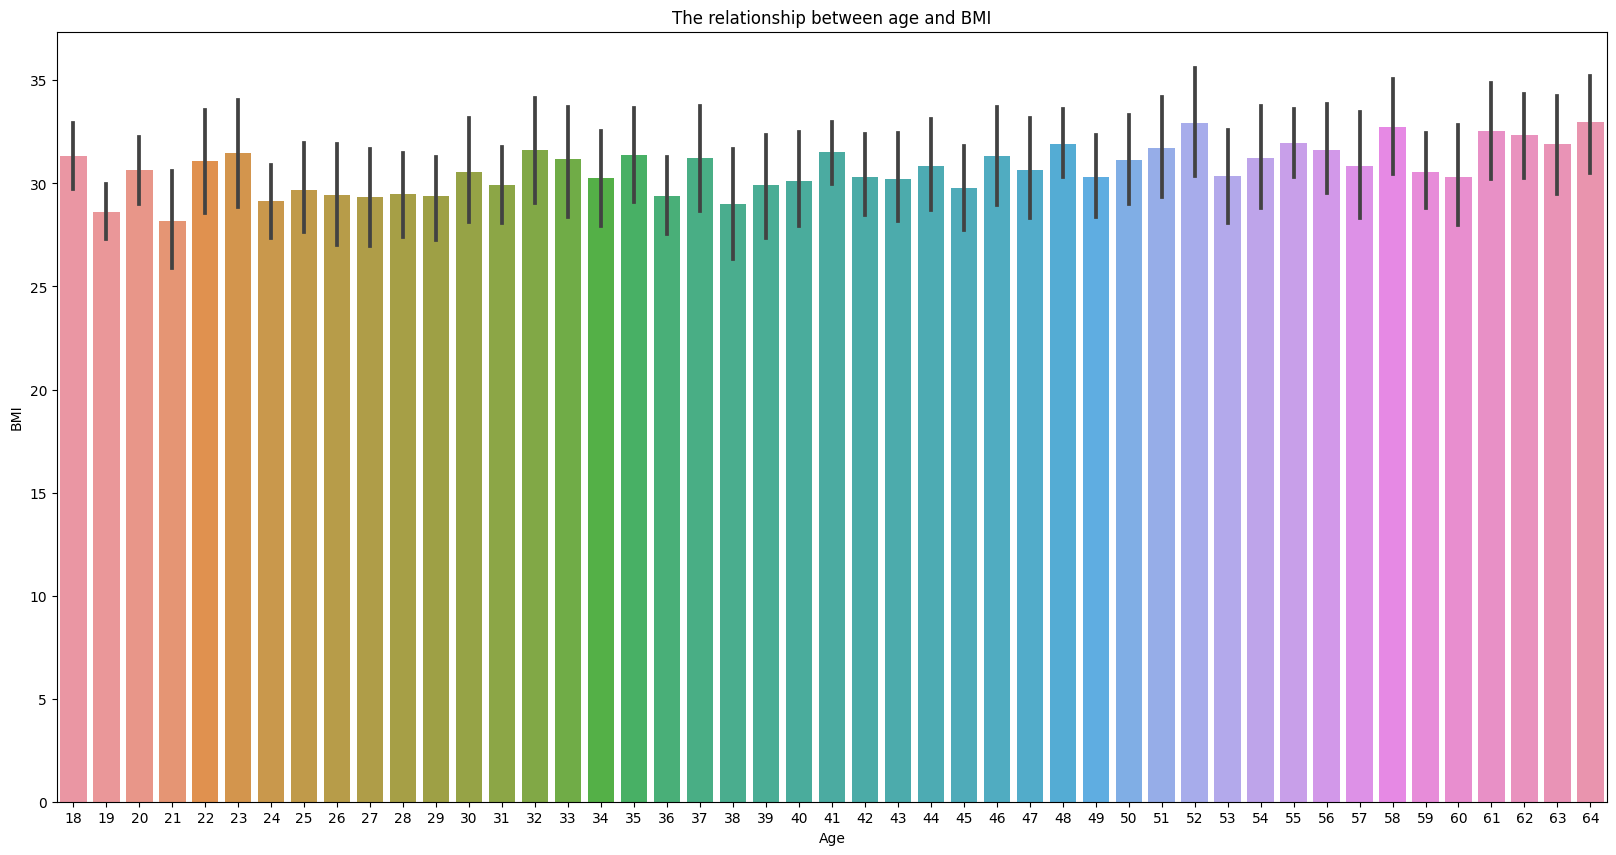

In [18]:
#The relationship between “age” and “bmi”

plt.figure(figsize=(20,10))
sns.barplot(x="age", y="bmi", data=df)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("The relationship between age and BMI")
plt.show()

In [19]:
most_bmi_age = df.groupby('bmi')['age'].sum().idxmax()
print(f"Age range with the most BMI: {most_bmi_age}")

Age range with the most BMI: 32.3


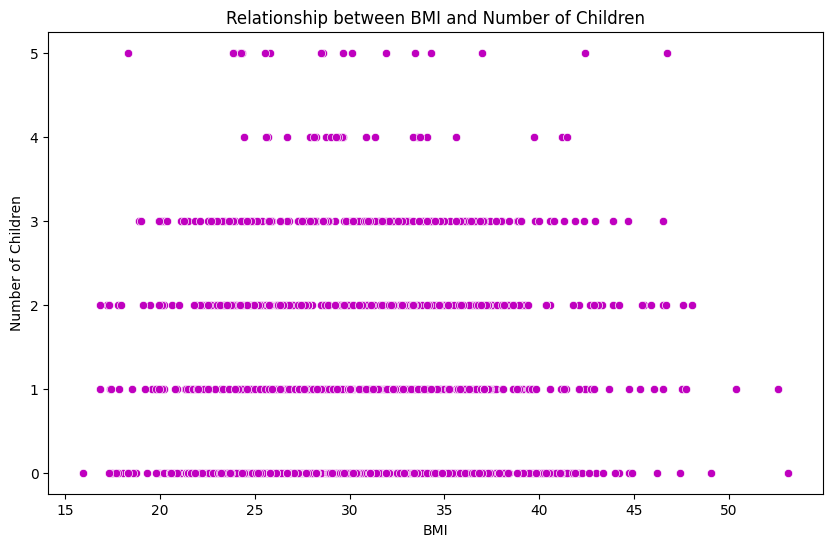

In [20]:
#The relationship between “bmi” and “children”

plt.figure(figsize=(10, 6))
sns.scatterplot(x="bmi", y="children", data=df, color="m")
plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Relationship between BMI and Number of Children")
plt.show()

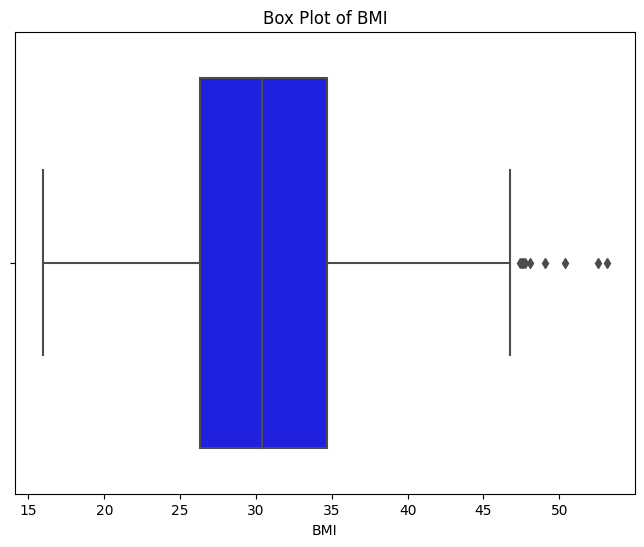

In [21]:
#Find outliers with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["bmi"], color="blue")
plt.xlabel("BMI")
plt.title("Box Plot of BMI")
plt.show()

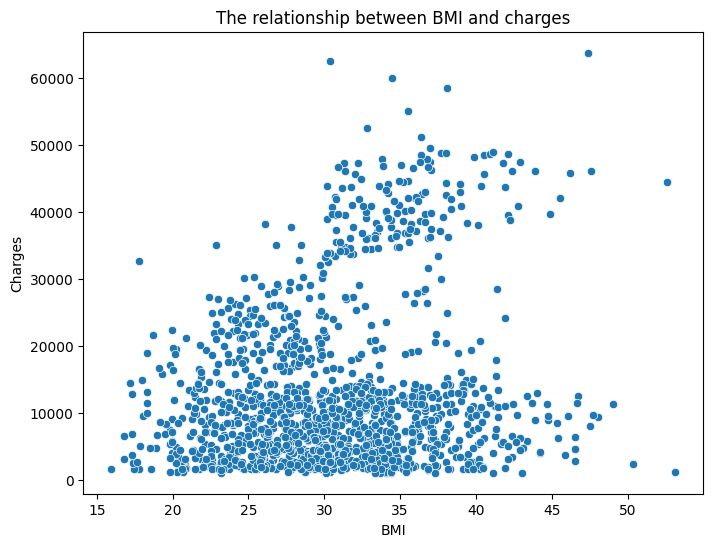

In [22]:
#The relationship between “bmi” and “charges”

plt.figure(figsize=(8, 6))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("The relationship between BMI and charges")
plt.show()

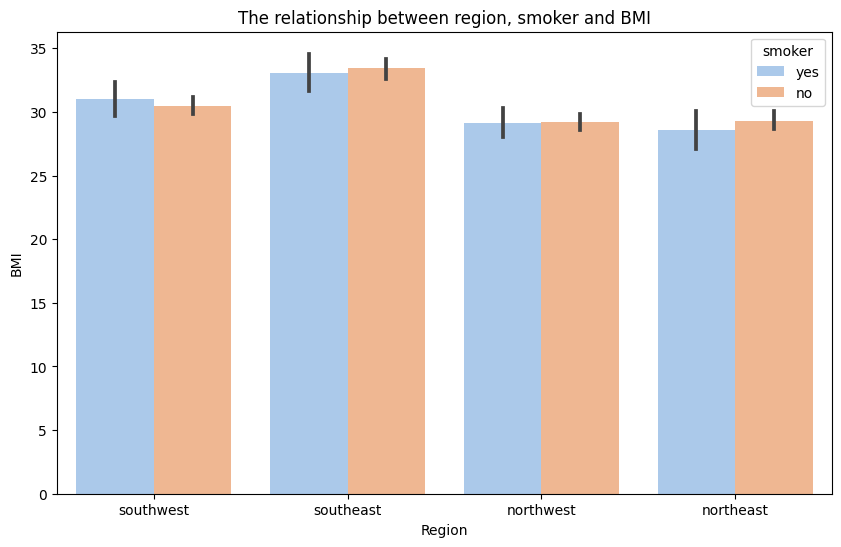

In [23]:
#The relationship between “region”, “smoker” and “bmi” using bar plot

plt.figure(figsize=(10,6))
sns.barplot(x="region", y="bmi", hue="smoker", data=df, palette="pastel")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("The relationship between region, smoker and BMI")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate target variable and features
y = df['charges']
X = df.drop(['charges'], axis=1)

#Apply Label Encoding and One-Hot Encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded["sex_encoded"] = label_encoder.fit_transform(X_encoded["sex"])
X_encoded["smoker_encoded"] = label_encoder.fit_transform(X_encoded["smoker"])
X_encoded["region_encoded"] = label_encoder.fit_transform(X_encoded["region"])
X_encoded = pd.get_dummies(X_encoded, columns=["sex", "smoker", "region"], drop_first=True)

#Drop the 'bmi_group' column
X_encoded = X_encoded.drop(['bmi'], axis=1)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

#Use preprocessed data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#Choose regression models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  #Specify the alpha of the ridge regression

#Evaluate model performance with cross validation
linear_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

#Make cross validation results positive (to calculate RMSE)
linear_rmse_scores = np.sqrt(-linear_scores)
ridge_rmse_scores = np.sqrt(-ridge_scores)

#Examine model performances
print(f"Linear Regression RMSE Scores: { linear_rmse_scores}")
print(f"Ridge Regression RMSE Scores: {ridge_rmse_scores}")

#Choose the best performing model (lower RMSE indicates better performance)
best_model = "Linear Regression" if np.mean(linear_rmse_scores) < np.mean(ridge_rmse_scores) else "Ridge Regression"
print(f"Best performing model: {best_model}")


Linear Regression RMSE Scores: [6483.62146079 6149.8938484  6079.78788967 7196.96189258 6285.74877714]
Ridge Regression RMSE Scores: [6485.00474987 6151.27883995 6078.38539327 7191.94920529 6289.45533508]
Best performing model: Linear Regression


In [33]:
from sklearn.model_selection import GridSearchCV

#Specify parameter ranges for hyperparameter optimization
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  #Alpha value of Ridge Regression
    'fit_intercept': [True, False],    #Intercept value for Linear Regression
}

#Choose the Ridge Regression model (as an example)
model = Ridge()

#Optimize hyperparameters with GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

#Get the best parameters and scores
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"The best parameters: {best_params}")
print(f"Best RMSE score: {best_score}")


The best parameters: {'alpha': 1.0, 'fit_intercept': True}
Best RMSE score: 6451.692316675045


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Get predictions of the optimized model
y_pred = grid_search.predict(X_test_scaled)

#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#R-Squared (Coefficient of Determination, R-squared)
r2 = r2_score(y_test, y_pred)

#Print the results
print(f"Square of Mean Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")


Square of Mean Error (MSE): 37743193.21586975
Mean Absolute Error (MAE): 3942.6013270877597
Root Mean Square Error (RMSE): 6143.548910513348
R-Squared: 0.7568856579168266
